In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
df = pd.read_csv('Housing_Price/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Null Value Columns
nullseries= df.isna().sum()
print(nullseries[nullseries > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## **Drop Outliers & EDA**

In [ ]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Use K-Fold Later
from sklearn.model_selection import train_test_split
# Split the dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Text(0, 0.5, 'Frequency')

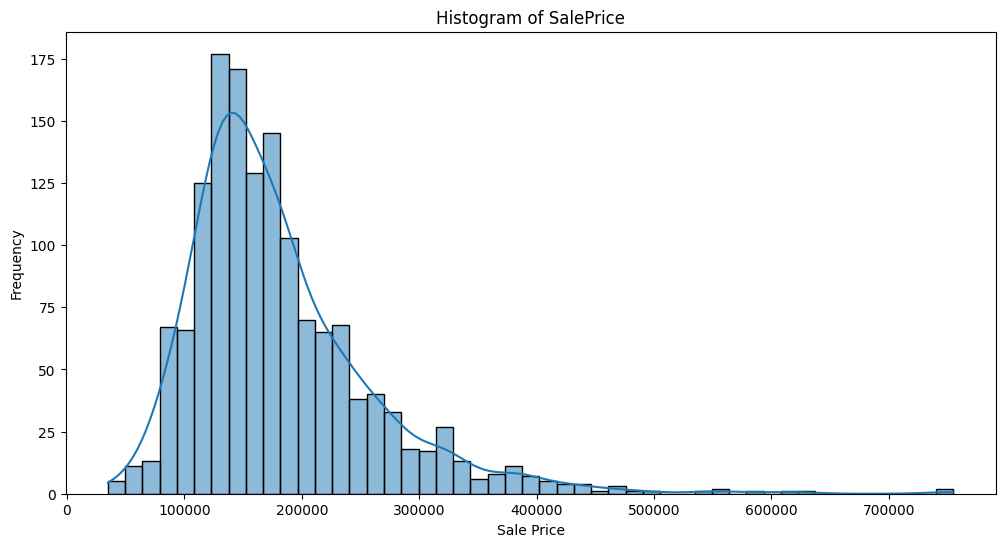

In [ ]:
# Histogram for SalePrice
plt.figure(figsize=(12,6))
sns.histplot(y,kde=True)
plt.title('Histogram of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

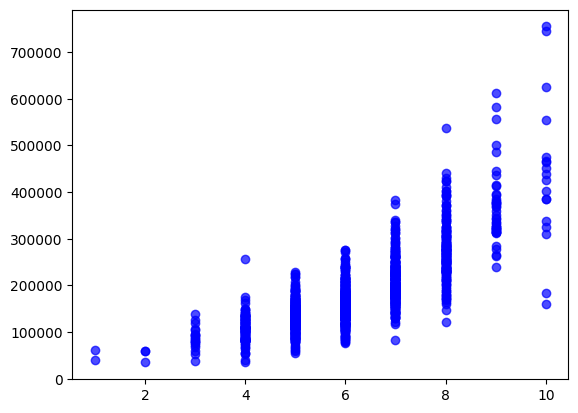

In [ ]:
plt.scatter(x['OverallQual'], y, color='blue', alpha=0.7)

In [ ]:
# drop outliers
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = y_train[(y_train < lower_bound) | (y_train > upper_bound)]

# Remove outliers from the dataset
y_cleaned = y_train.drop(outliers.index)
x_cleaned = x_train.drop(outliers.index)

<ipython-input-16-65298010dd87>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
<ipython-input-16-65298010dd87>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=60, ha='right')  # Rotate x-axis labels


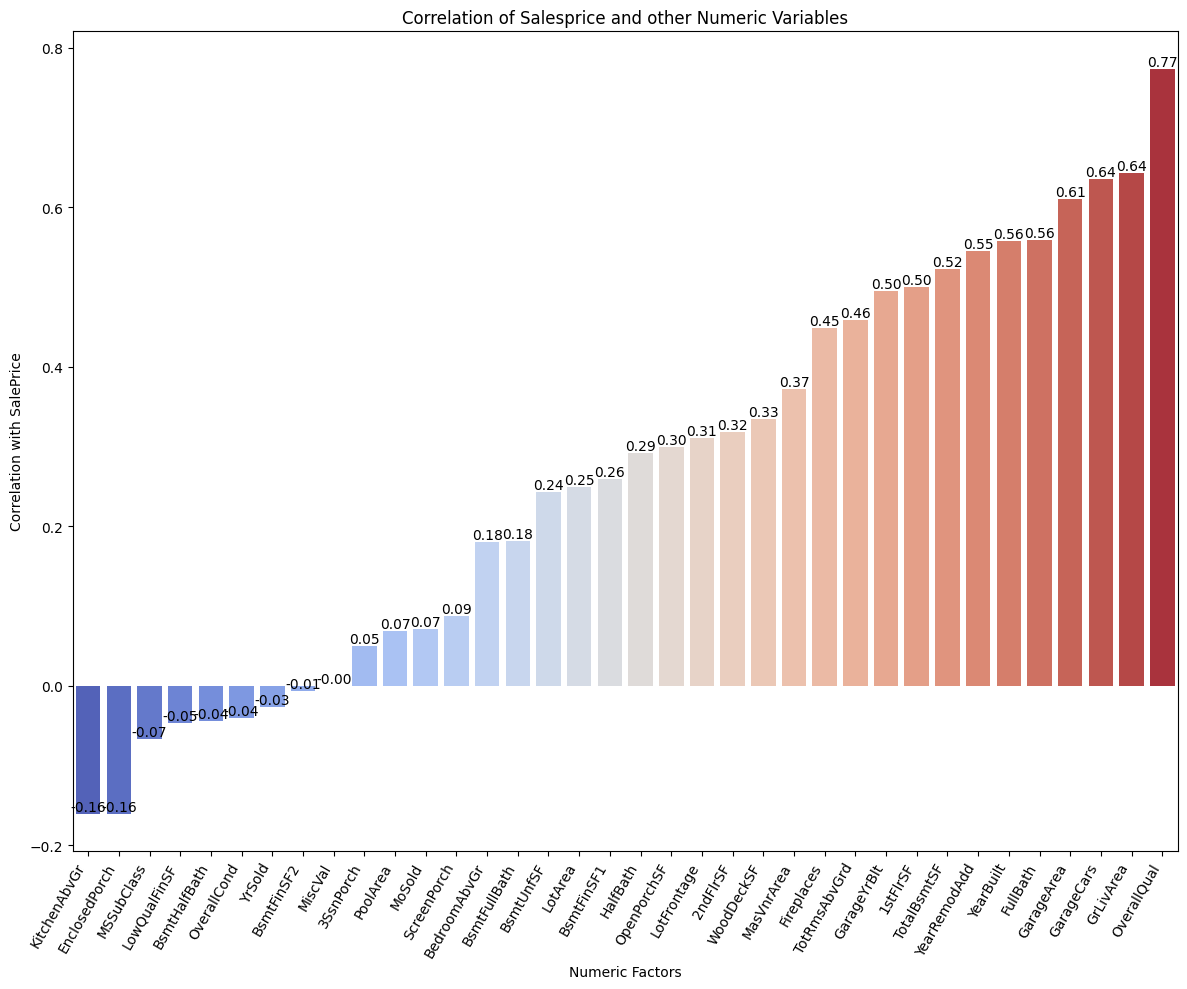

In [ ]:
#Create heat map of all numeric variables
# Select only numeric variables
x_cleaned_numeric = x_cleaned.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'])

# Calculate the correlation matrix
train_data = pd.concat([x_cleaned_numeric, y_cleaned], axis=1)
correlation_matrix = train_data.corr()
correlation_matrix = correlation_matrix['SalePrice'].drop('SalePrice').sort_values()
correlation_matrix=correlation_matrix.sort_values()

# Plot barplot for correlation
plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
plt.title('Correlation of Salesprice and other Numeric Variables')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=60, ha='right')  # Rotate x-axis labels
plt.xlabel('Numeric Factors')
plt.ylabel('Correlation with SalePrice')
for index, value in enumerate(correlation_matrix):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# I can see 13 variables has correlation greater than 0.5

In [ ]:
categorical_variables = x_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

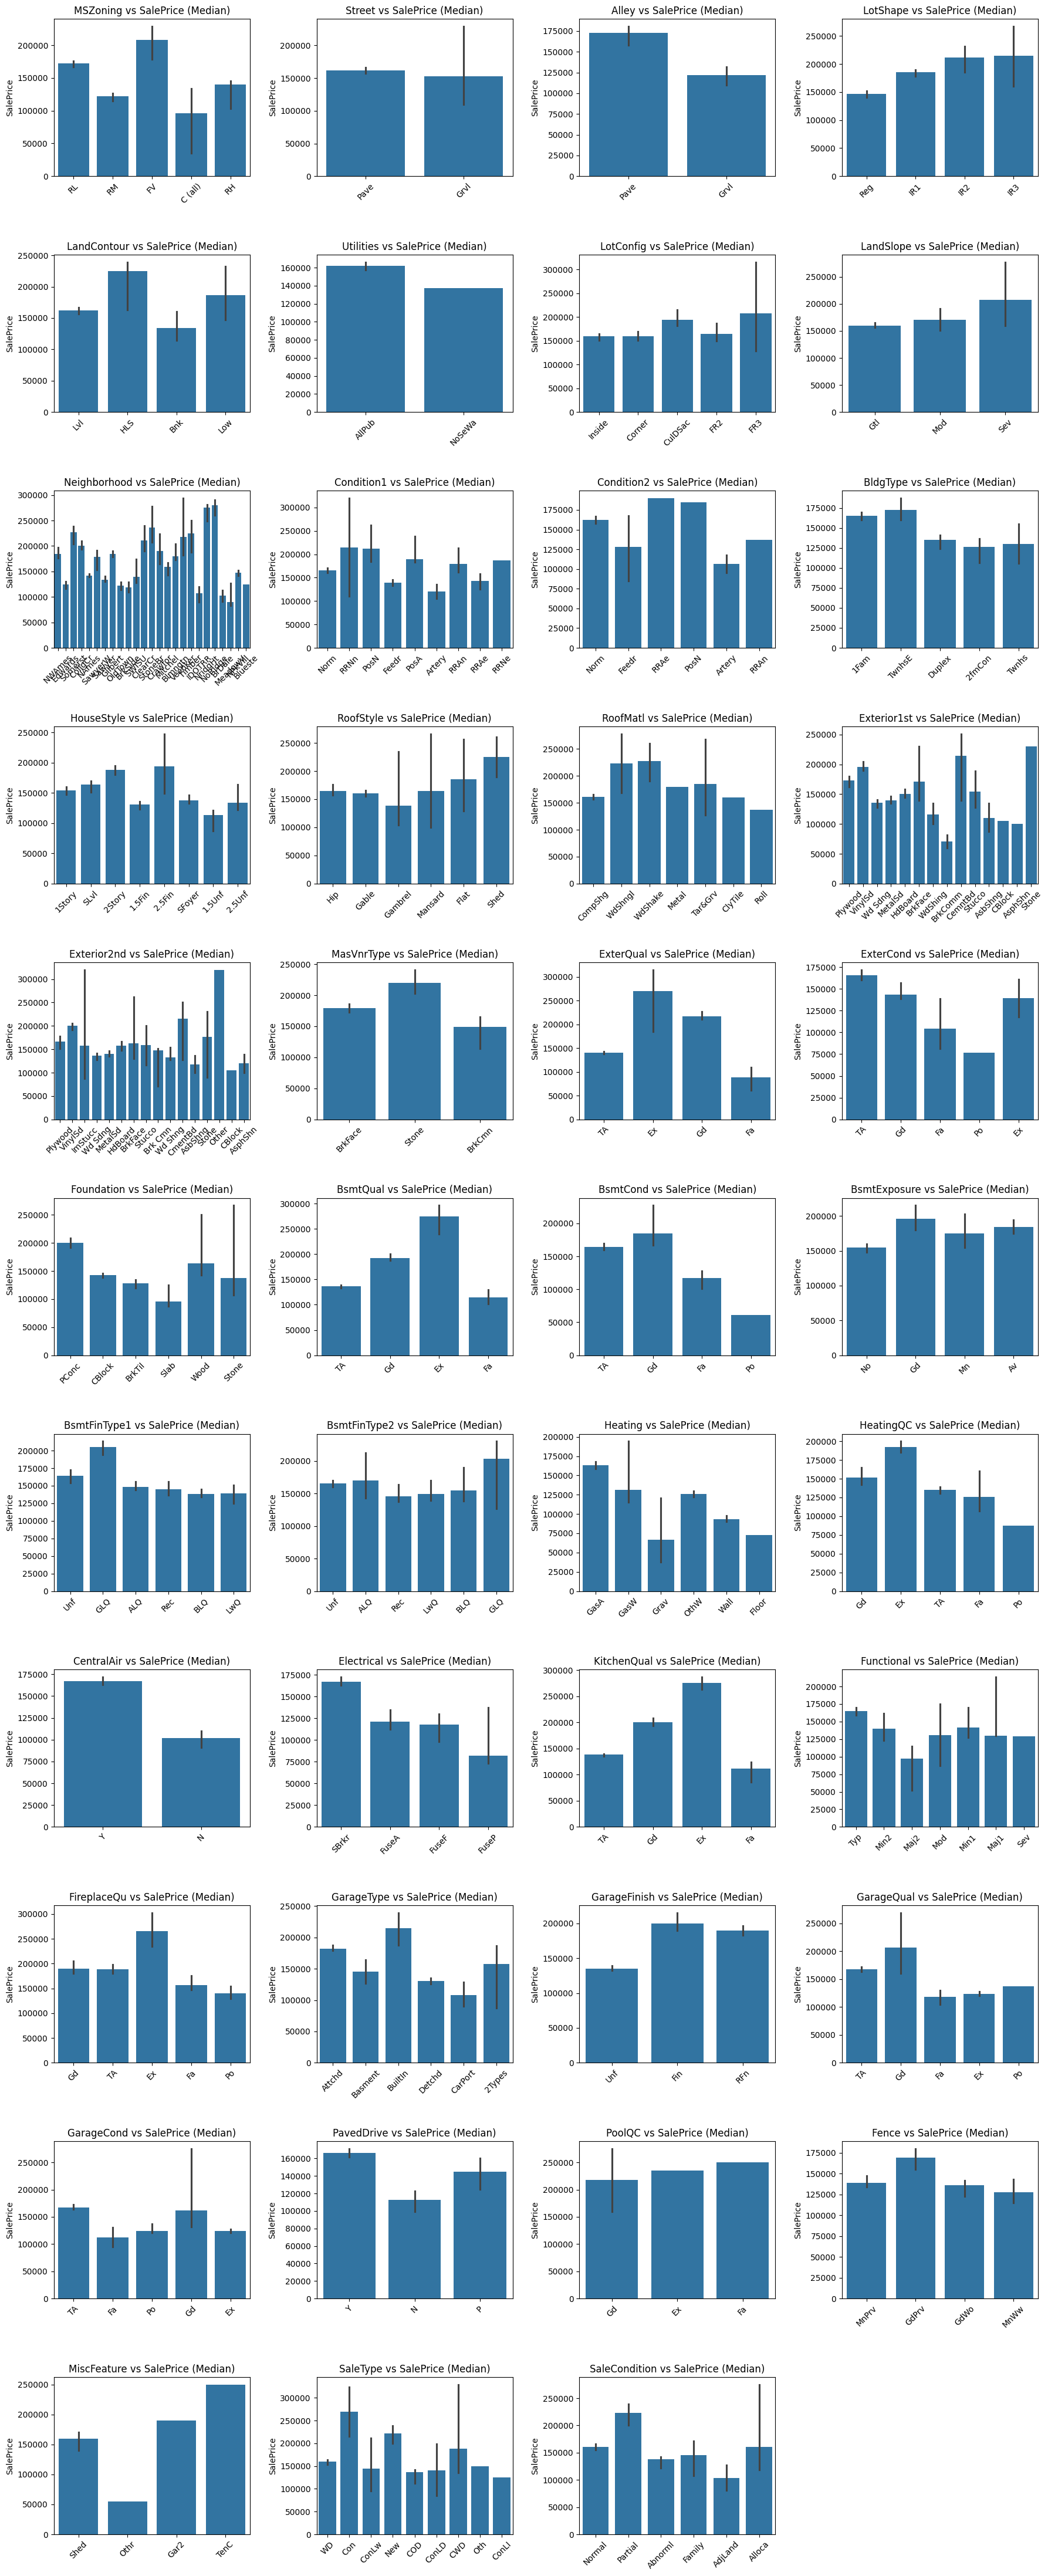

In [ ]:
#This is designed to run once
import numpy as np

# Create subplots
num_plots = len(categorical_variables)
cols_per_row = 4
rows = num_plots // cols_per_row + 1
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows))

for idx, col in enumerate(categorical_variables):
    row_idx = idx // cols_per_row
    col_idx = idx % cols_per_row
    ax = axes[row_idx, col_idx]
    sns.barplot(x=x_cleaned[col], y=y_cleaned, estimator=np.median, ax=ax)
    ax.set_title(f'{col} vs SalePrice (Median)')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.set_xlabel('')  # Remove x-axis label for better clarity
    ax.set_ylabel('SalePrice')
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.subplots_adjust(hspace=0.5)  # Add vertical spacing between subplots

# Remove empty subplots if any
if num_plots % cols_per_row != 0:
    for i in range(cols_per_row - (num_plots % cols_per_row)):
        fig.delaxes(axes[-1, -(i+1)])

# # I can see MSZoning 'FV', Pave street, Pave Alley, IR2 lot shape, HLS land contour, Allpub utility,
# # NoRidge/NridgHr/StroneBr Neighborhood, PosN/PosA Condition2, 1Fam/TwnhsE BldgType, 2stroy/SLvl HouseStyle,
# # WdShngl RoofMatl, Exterior CemntBd/Stone/Imstucc/VinylSd, EX BsmtQual, PConc Foundation, Gd BsmtCond, GLQ BsmtFinType1, GasA Heating, Y Central Air
# # SBrkr Electrical, Ex heatingQC, Ex KitchenQual, Ex FireplaceQu, Builtin GarageType, Gd GarageQual, Y PavedDrive, Ex PoolQC, Tenc MiscFeature, Con/New for SaleType
# # Partial SalesCondition

## **Feature Engineering**

In [ ]:
#Feature Engineering: Step 1 One Key Encoding Categorical Variable to boolean column
x_encoded = pd.get_dummies(x_cleaned)
x_encoded.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,False,False,False,True,False,False,False,False,True,False
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,False,False,False,True,False,False,False,False,True,False
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,False,False,False,False,False,False,False,False,True,False
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,False,False,False,True,False,False,False,False,True,False
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
#Feature Engineering: Step 2 Create Some Additional Variables
x_encoded['Nonlivingarea']=x_encoded['GarageArea']+x_encoded['PoolArea']+x_encoded['WoodDeckSF']
x_encoded['QualityCondition']=x_encoded['OverallQual']+x_encoded['OverallCond']

#Feature Engineering: Step 3 Fill NaN with Median
x_encoded = x_encoded.fillna(x_encoded.median())

# **Ridge Regression using Standard Scaling, log transform SalePrice**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Standard scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded) # fit it on the training data

x_scaled_with_const = sm.add_constant(x_scaled)

k_fold = ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=None)
ridge_model = RidgeCV(alphas=np.arange(0.01,1,.01), cv=k_fold)
ridge_model.fit(x_scaled_with_const,np.log(y_cleaned))

print(ridge_model.alpha_)

0.99


In [ ]:
#One Key Encoding Categorical Variable to boolean column
x_test_cleaned_encoded = pd.get_dummies(x_test)

# Create Some Additional Variables
x_test_cleaned_encoded['Nonlivingarea']=x_test_cleaned_encoded['GarageArea']+x_test_cleaned_encoded['PoolArea']+x_test_cleaned_encoded['WoodDeckSF']
x_test_cleaned_encoded['QualityCondition']=x_test_cleaned_encoded['OverallQual']+x_test_cleaned_encoded['OverallCond']

# Fill NaN with Median
x_test_cleaned_encoded = x_test_cleaned_encoded.fillna(x_test_cleaned_encoded.median())

# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(x_test_cleaned_encoded.columns) - set(x_encoded.columns)
x_test_cleaned_encoded=x_test_cleaned_encoded.drop(columns=missing_cols)

missing_cols = set(x_encoded.columns)- set(x_test_cleaned_encoded.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test_cleaned_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(x_test_cleaned_encoded.columns))
print(len(x_encoded.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_encoded.columns

x_test_cleaned_encoded = x_test_cleaned_encoded[train_columns]

scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test_cleaned_encoded) # fit it on the training data

# predict using trained model
x_test_scaled = sm.add_constant(x_test_scaled)

y_pred = ridge_model.predict(x_test_scaled)

285
285


<ipython-input-28-14e1b3deb50d>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = False
<ipython-input-28-14e1b3deb50d>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = False
<ipython-input-28-14e1b3deb50d>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_test, np.exp(y_pred))
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_test, np.exp(y_pred))
print("R^2 Score:", r2)

Mean Squared Error: 521085126.4714137
R^2 Score: 0.925325576823251


## **Make prediction of Kaggle Test Dataset**

In [ ]:
df=pd.read_csv('Housing_Price/test.csv')

In [ ]:
#One Key Encoding Categorical Variable to boolean column
df_encoded = pd.get_dummies(df)

# Create Some Additional Variables
df_encoded['Nonlivingarea']=df_encoded['GarageArea']+df_encoded['PoolArea']+df_encoded['WoodDeckSF']
df_encoded['QualityCondition']=df_encoded['OverallQual']+df_encoded['OverallCond']

# Fill NaN with Median
df_encoded = df_encoded.fillna(df_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(df_encoded.columns) - set(x_encoded.columns)
df_encoded=df_encoded.drop(columns=missing_cols)

missing_cols = set(x_encoded.columns)- set(df_encoded)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(df_encoded.columns))
print(len(x_encoded.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_encoded.columns

df_encoded = df_encoded[train_columns]

scaler = StandardScaler()
df_encoded_scaled = scaler.fit_transform(df_encoded) # fit it on the training data

# predict using trained model
df_encoded_scaled = sm.add_constant(df_encoded_scaled)

y_pred = ridge_model.predict(df_encoded_scaled)

285
285


<ipython-input-17-a20c7d108082>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-17-a20c7d108082>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-17-a20c7d108082>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[

In [ ]:
np.exp(y_pred)

array([123502.96007943, 161977.04965682, 186117.86713172, ...,
       179862.60640037, 117580.71660413, 214293.07572434])

In [ ]:
result=pd.concat([df['Id'],pd.DataFrame(np.exp(y_pred))],axis=1)
result.rename(columns={0:'SalePrice'},inplace=True)

In [ ]:
result.to_csv('Housing_Price/ridge_model_prediction.csv',index=False)

## **Regression Model 1 Lasso Regression Standard Scaling, no log transform**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from sklearn.model_selection import ShuffleSplit, cross_val_score
import numpy as np

# Standard scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded) # fit it on the training data

x_scaled_with_const = sm.add_constant(x_scaled)

lasso_model1 = LassoCV(alphas=np.arange(0.01,1,0.1),cv=2)
lasso_model1.fit(x_scaled_with_const,y_cleaned)

print(lasso_model1.alpha_)

#Model Does not Converge, need log transform dependent Variable

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9440718908.326355, tolerance: 153470129.04471207
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9198379145.999481, tolerance: 153470129.04471207
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9182347181.714073, tolerance: 153470129.04471207
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergence

0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.691e+10, tolerance: 3.420e+08
  model = cd_fast.enet_coordinate_descent(


## **Regression Model 2 Lasso Regression Standard Scaling, log transform SalePrice**

In [ ]:
# Create Linear Model with Standard Scaling of Independent Variable
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded) # fit it on the training data


x_scaled_with_const = sm.add_constant(x_scaled)


k_fold = ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=None)
lasso_model2 = LassoCV(alphas=np.arange(0.001,1,.001),cv=k_fold)

#log transform y_cleaned
lasso_model2.fit(x_scaled_with_const,np.log(y_cleaned))


print(lasso_model2.alpha_)

0.007


In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred2 = lasso_model2.predict(x_test_scaled)

mse = mean_squared_error(y_test, np.exp(y_pred2))
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_test, np.exp(y_pred2))
print("R^2 Score:", r2)

Mean Squared Error: 732493053.8859528
R^2 Score: 0.8950296343127162


In [ ]:
len([i for i in lasso_model2.coef_ if abs(i) > 0.001])

56

## **Make prediction of Kaggle Test Dataset**

In [ ]:
df=pd.read_csv('Housing_Price/test.csv')

In [ ]:
#One Key Encoding Categorical Variable to boolean column
df_encoded = pd.get_dummies(df)

# Create Some Additional Variables
df_encoded['Nonlivingarea']=df_encoded['GarageArea']+df_encoded['PoolArea']+df_encoded['WoodDeckSF']
df_encoded['QualityCondition']=df_encoded['OverallQual']+df_encoded['OverallCond']

# Fill NaN with Median
df_encoded = df_encoded.fillna(df_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(df_encoded.columns) - set(x_encoded.columns)
df_encoded=df_encoded.drop(columns=missing_cols)

missing_cols = set(x_encoded.columns)- set(df_encoded)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(df_encoded.columns))
print(len(x_encoded.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_encoded.columns

df_encoded = df_encoded[train_columns]

scaler = StandardScaler()
df_encoded_scaled = scaler.fit_transform(df_encoded) # fit it on the training data

# predict using trained model
df_encoded_scaled = sm.add_constant(df_encoded_scaled)

y_pred = lasso_model2.predict(df_encoded_scaled)

<ipython-input-65-5b3dd268ab2a>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-65-5b3dd268ab2a>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-65-5b3dd268ab2a>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[

285
285


In [ ]:
np.exp(y_pred)

array([120068.195814  , 150472.17809362, 175488.6066715 , ...,
       161509.65922323, 118667.22412133, 223657.59618745])

In [ ]:
result=pd.concat([df['Id'],pd.DataFrame(np.exp(y_pred))],axis=1)
result.rename(columns={0:'SalePrice'},inplace=True)
result.to_csv('Housing_Price/lasso_modelprediction.csv',index=False)

# ElasticNet Regression using Standard Scaling, log transform SalePrice

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.model_selection import ShuffleSplit, cross_val_score
import numpy as np

# Standard scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded) # fit it on the training data

x_scaled_with_const = sm.add_constant(x_scaled)

k_fold = ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=None)
param_grid = {'alpha': np.arange(0.01, 1.0, 0.01), 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
e_net = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=42)
grid_model = GridSearchCV(e_net, param_grid, cv=k_fold, n_jobs = -1)
grid_model.fit(x_scaled_with_const, np.log(y_cleaned))

print("Best parameters : {}".format(grid_model.best_params_))
print("Best cross validation score: {:.2f}".format(grid_model.best_score_))
print("Best estimator: {}".format(grid_model.best_estimator_))

Best parameters : {'alpha': 0.06999999999999999, 'l1_ratio': 0.1}
Best cross validation score: 0.84
Best estimator: ElasticNet(alpha=0.06999999999999999, l1_ratio=0.1, max_iter=10000,
           random_state=42)


In [ ]:
#One Key Encoding Categorical Variable to boolean column
x_test_cleaned_encoded = pd.get_dummies(x_test)

# Create Some Additional Variables
x_test_cleaned_encoded['Nonlivingarea']=x_test_cleaned_encoded['GarageArea']+x_test_cleaned_encoded['PoolArea']+x_test_cleaned_encoded['WoodDeckSF']
x_test_cleaned_encoded['QualityCondition']=x_test_cleaned_encoded['OverallQual']+x_test_cleaned_encoded['OverallCond']

# Fill NaN with Median
x_test_cleaned_encoded = x_test_cleaned_encoded.fillna(x_test_cleaned_encoded.median())

# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(x_test_cleaned_encoded.columns) - set(x_encoded.columns)
x_test_cleaned_encoded=x_test_cleaned_encoded.drop(columns=missing_cols)

missing_cols = set(x_encoded.columns)- set(x_test_cleaned_encoded.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test_cleaned_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(x_test_cleaned_encoded.columns))
print(len(x_encoded.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_encoded.columns

x_test_cleaned_encoded = x_test_cleaned_encoded[train_columns]

scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test_cleaned_encoded) # fit it on the training data

# predict using trained model
x_test_scaled = sm.add_constant(x_test_scaled)

y_pred = grid_model.predict(x_test_scaled)

285
285


<ipython-input-46-3ac394d855a0>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = False
<ipython-input-46-3ac394d855a0>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = False
<ipython-input-46-3ac394d855a0>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_test, np.exp(y_pred))
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_test, np.exp(y_pred))
print("R^2 Score:", r2)

Mean Squared Error: 842684381.5541793
R^2 Score: 0.879238598616831


## **Make prediction of Kaggle Test Dataset**

In [ ]:
df=pd.read_csv('Housing_Price/test.csv')

In [ ]:
#One Key Encoding Categorical Variable to boolean column
df_encoded = pd.get_dummies(df)

# Create Some Additional Variables
df_encoded['Nonlivingarea']=df_encoded['GarageArea']+df_encoded['PoolArea']+df_encoded['WoodDeckSF']
df_encoded['QualityCondition']=df_encoded['OverallQual']+df_encoded['OverallCond']

# Fill NaN with Median
df_encoded = df_encoded.fillna(df_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(df_encoded.columns) - set(x_encoded.columns)
df_encoded=df_encoded.drop(columns=missing_cols)

missing_cols = set(x_encoded.columns)- set(df_encoded)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(df_encoded.columns))
print(len(x_encoded.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_encoded.columns

df_encoded = df_encoded[train_columns]

scaler = StandardScaler()
df_encoded_scaled = scaler.fit_transform(df_encoded) # fit it on the training data

# predict using trained model
df_encoded_scaled = sm.add_constant(df_encoded_scaled)

y_pred = grid_model.predict(df_encoded_scaled)

285
285


<ipython-input-49-1460392a5d66>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-49-1460392a5d66>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-49-1460392a5d66>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[

In [ ]:
np.exp(y_pred)

array([122491.0143935 , 150746.8430316 , 173745.35496336, ...,
       161687.03877448, 118019.24811915, 220735.98127305])

In [ ]:
result=pd.concat([df['Id'],pd.DataFrame(np.exp(y_pred))],axis=1)
result.rename(columns={0:'SalePrice'},inplace=True)
result.to_csv('Housing_Price/grid_model_prediction.csv',index=False)